# Aircraft Risk Analysis

## Overview

This project uses data cleaning, imputation, analysis, and visualization to generate insights for the company, which aims to expand into new industries.

## Business Problem

The company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. I am charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. I must then translate my findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase, as well as find other meaningful insights from the data that may be key for the stakeholders.

## Objectives

Main objective:  Giving recommendations on which aircrafts to purchase, based on the risk assessment.  
Other objectives:  
Identify the general trend on the number of aircraft accidents over the years.  
Identify the phases of flight where the aircrafts are most vulnerable to accidents.  
Analyze the states in US whereby the aircraft accidents are most frequent.  
Analyze the effects of weather conditions on the occurrence of accidents.  
Analyze the seasons during which the accidents are most rampant.

## Data Understanding

In the data folder is the 'AviationData.csv' file, a dataset from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters. Additionally, there is a 'USState_Codes.csv' file, which has two columns, one having the various states in the USA, and the second column having the corresponding abbreviations used for each state.

In [1]:
# Importing the necessary libraries to be used in the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the datasets into pandas DataFrames
# We use the argument encoding='latin-1' because some bytes can't be decoded in 'utf-8'
# To avoid that error, we use the encoding='latin-1' argument
aviation_data = pd.read_csv('data/AviationData.csv', encoding='latin-1')
state_codes = pd.read_csv('data/USState_Codes.csv')
# We get a warning that some columns have mixed types but we'll take care of that later in Data cleaning

C:\Users\HP\AppData\Local\Temp\ipykernel_18892\1598760940.py:4: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  aviation_data = pd.read_csv('data/AviationData.csv', encoding='latin-1')


In [3]:
# Getting an overview of the data, incuding the non-null values in the columns
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [4]:
# Summary of the state codes dataset
state_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   US_State      62 non-null     object
 1   Abbreviation  62 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


### Aviation Data

The Aviation dataset includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters. Among the columns is the event ID, the country where it took place, aircraft model, number of injuries etc.

In [5]:
# Viewing the first 5 rows of the dataset
aviation_data.head(5)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


### US State Codes Data

The US State Codes data has the USA states listed in one column, and the corresponding abbreviations for the states listed in the other column.

In [6]:
# Viewing the first five rows of the US State codes data.
state_codes.head(5)

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


Summary of unique values in the categorical columns

In [7]:
aviation_data.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

## Data Preparation

I am mostly interested in getting the data from the incidents that occurred in the USA, analyzing the states in which they occurred, the periods, and the broad phase of flight for my analysis.

### Data Cleaning

For the Aviation dataset, I make it easier to work with by normalizing columns names and dropping unnecessary columns
The columns include those that I will not be needing in my analysis, and others like longitude and latitude which have an insane number of missing values.

In [8]:
# Making columns easier to use
aviation_data.columns = aviation_data.columns.str.lower().str.replace('.', '_', regex=False)

# Dropping unnecessary columns
aviation_data.drop(columns=[
    'event_id', 'accident_number', 'latitude', 'longitude', 
    'airport_code', 'airport_name', 'registration_number', 
    'far_description', 'schedule', 'air_carrier', 
    'report_status', 'publication_date'
], inplace=True)

# Confirming if the columns have actually been dropped
aviation_data.columns

Index(['investigation_type', 'event_date', 'location', 'country',
       'injury_severity', 'aircraft_damage', 'aircraft_category', 'make',
       'model', 'amateur_built', 'number_of_engines', 'engine_type',
       'purpose_of_flight', 'total_fatal_injuries', 'total_serious_injuries',
       'total_minor_injuries', 'total_uninjured', 'weather_condition',
       'broad_phase_of_flight'],
      dtype='object')

In [9]:
# List of non-numeric columns
non_numeric_columns = [
    'investigation_type', 'event_date', 'location', 'country', 
    'injury_severity', 'aircraft_damage', 'aircraft_category', 
    'make', 'model', 'amateur_built', 'engine_type', 
    'purpose_of_flight', 'weather_condition', 'broad_phase_of_flight'
]

# Display unique values for each non-numeric column
for column in non_numeric_columns:
    print(f"Unique values in {column} - {aviation_data[column].nunique()} values:")
    print(aviation_data[column].unique())
    print("\n")

Unique values in investigation_type - 2 values:
['Accident' 'Incident']


Unique values in event_date - 14782 values:
['1948-10-24' '1962-07-19' '1974-08-30' ... '2022-12-22' '2022-12-26'
 '2022-12-29']


Unique values in location - 27758 values:
['MOOSE CREEK, ID' 'BRIDGEPORT, CA' 'Saltville, VA' ... 'San Manual, AZ'
 'Auburn Hills, MI' 'Brasnorte, ']


Unique values in country - 219 values:
['United States' nan 'GULF OF MEXICO' 'Puerto Rico' 'ATLANTIC OCEAN'
 'HIGH ISLAND' 'Bahamas' 'MISSING' 'Pakistan' 'Angola' 'Germany'
 'Korea, Republic Of' 'Martinique' 'American Samoa' 'PACIFIC OCEAN'
 'Canada' 'Bolivia' 'Mexico' 'Dominica' 'Netherlands Antilles' 'Iceland'
 'Greece' 'Guam' 'Australia' 'CARIBBEAN SEA' 'West Indies' 'Japan'
 'Philippines' 'Venezuela' 'Bermuda' 'San Juan Islands' 'Colombia'
 'El Salvador' 'United Kingdom' 'British Virgin Islands' 'Netherlands'
 'Costa Rica' 'Mozambique' 'Jamaica' 'Panama' 'Guyana' 'Norway'
 'Hong Kong' 'Portugal' 'Malaysia' 'Turks And Caicos Islands

In [10]:
# Getting the number of null values in the columns
aviation_data.isna().mean()

investigation_type        0.000000
event_date                0.000000
location                  0.000585
country                   0.002542
injury_severity           0.011250
aircraft_damage           0.035932
aircraft_category         0.636772
make                      0.000709
model                     0.001035
amateur_built             0.001147
number_of_engines         0.068445
engine_type               0.079830
purpose_of_flight         0.069660
total_fatal_injuries      0.128261
total_serious_injuries    0.140737
total_minor_injuries      0.134246
total_uninjured           0.066510
weather_condition         0.050535
broad_phase_of_flight     0.305606
dtype: float64

###### Handling values in the aircraft_category column

More than half of the records are null (56602) as seen above. 
The value_counts() function can give a further breakdown on the distribution of the values:

In [11]:
# Using value_counts() function to see the distribution of the values
aviation_data['aircraft_category'].value_counts()

aircraft_category
Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: count, dtype: int64

Some categories are rare or synonymous, so I will:

Merge "Unknown" and "UNK" into a single category.
Merge "Ultralight" and "ULTR" since they might represent similar aircraft types.

This simplifies the data and reduces noise.

In [12]:
# Merging the synonymous categories
aviation_data['aircraft_category'] = aviation_data['aircraft_category'].replace({'UNK': 'Unknown', 'ULTR': 'Ultralight'})

I will impute Null Values with "Unknown"
Why: Since aircraft_category is missing in a large portion of the data, filling it with "Unknown" avoids discarding valuable rows while retaining its neutral meaning.
Rationale: This keeps our dataset complete for analysis without introducing bias.

In [13]:
# Imputing null values with unknown
aviation_data['aircraft_category'].fillna('Unknown', inplace=True)

In [14]:
# Using value_counts() to see how the data looks after implementing the changes
aviation_data['aircraft_category'].value_counts()

aircraft_category
Unknown              56618
Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              31
WSFT                     9
Powered-Lift             5
Blimp                    4
Rocket                   1
Name: count, dtype: int64

In [15]:
# Filling missing data in the 'location' column with 'Unknown'
aviation_data['location'].fillna('Unknown', inplace=True)

# Impute missing country values with unknown
aviation_data['country'].fillna('Unknown', inplace=True)

In [16]:
# using value_counts() function to see the distribution of values in the engine_type column
aviation_data['engine_type'].value_counts()

engine_type
Reciprocating      69530
Turbo Shaft         3609
Turbo Prop          3391
Turbo Fan           2481
Unknown             2051
Turbo Jet            703
Geared Turbofan       12
Electric              10
LR                     2
NONE                   2
Hybrid Rocket          1
UNK                    1
Name: count, dtype: int64

In [17]:
# Getting the two columns to see that mapping
aviation_data[['injury_severity','total_fatal_injuries', 'total_minor_injuries']]

,injury_severity,total_fatal_injuries,total_minor_injuries
0,Fatal(2),2.0,0.0
1,Fatal(4),4.0,0.0
2,Fatal(3),3.0,NaN
3,Fatal(2),2.0,0.0
4,Fatal(1),1.0,NaN
...,...,...,...
88884,Minor,0.0,0.0
88885,NaN,0.0,0.0
88886,Non-Fatal,0.0,0.0
88887,NaN,0.0,0.0


In [18]:
# Extract the number and convert it to a Series
extracted_fatalities = aviation_data['injury_severity'].str.extract(r'Fatal\((\d+)\)')[0].astype(float)

# Fill missing values in total_fatal_injuries with the extracted numbers
aviation_data['total_fatal_injuries'].fillna(extracted_fatalities, inplace=True)

# Fill remaining NaN values with 0 for cases like 'Minor' or null injury_severity
aviation_data['total_fatal_injuries'].fillna(0, inplace=True)

In [19]:
# Confirm the mapping is in place 
aviation_data[['injury_severity', 'total_fatal_injuries']].head(20)

,injury_severity,total_fatal_injuries
0,Fatal(2),2.0
1,Fatal(4),4.0
2,Fatal(3),3.0
3,Fatal(2),2.0
4,Fatal(1),1.0
5,Non-Fatal,0.0
6,Fatal(4),4.0
7,Non-Fatal,0.0
8,Non-Fatal,0.0
9,Non-Fatal,0.0


Some columns are critical for the analysis I want to do, so for some cases I will drop rows with null values in the critical columns. 
For others like engine_type and numer_of_engines, I will fill them with their mode

In [20]:
# Dropping rows with null values in critical columns
aviation_data.dropna(subset=['injury_severity', 'aircraft_damage', 'make', 'model', 'total_fatal_injuries'], inplace=True)

# Filling 'amateur_built', 'number_of_engines', and 'engine_type' with their mode
for column in ['amateur_built', 'number_of_engines', 'engine_type']:
    mode_value = aviation_data[column].mode()[0]
    aviation_data[column].fillna(mode_value, inplace=True)

# Check remaining nulls in key columns after the changes
aviation_data[['location', 'country', 'injury_severity', 'total_fatal_injuries', 'aircraft_damage', 
               'make', 'model', 'amateur_built', 'number_of_engines', 
               'engine_type']].isna().sum()

location                0
country                 0
injury_severity         0
total_fatal_injuries    0
aircraft_damage         0
make                    0
model                   0
amateur_built           0
number_of_engines       0
engine_type             0
dtype: int64

In [21]:
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85121 entries, 0 to 88886
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   investigation_type      85121 non-null  object 
 1   event_date              85121 non-null  object 
 2   location                85121 non-null  object 
 3   country                 85121 non-null  object 
 4   injury_severity         85121 non-null  object 
 5   aircraft_damage         85121 non-null  object 
 6   aircraft_category       85121 non-null  object 
 7   make                    85121 non-null  object 
 8   model                   85121 non-null  object 
 9   amateur_built           85121 non-null  object 
 10  number_of_engines       85121 non-null  float64
 11  engine_type             85121 non-null  object 
 12  purpose_of_flight       81038 non-null  object 
 13  total_fatal_injuries    85121 non-null  float64
 14  total_serious_injuries  72953 non-null  flo

In [22]:
# Ensure we drop rows where all three columns are null, while keeping index alignment
aviation_data = aviation_data.loc[
    aviation_data[['total_serious_injuries', 'total_minor_injuries', 'total_uninjured']].notnull().any(axis=1)
]

# Check the updated row count
print(f"Updated number of rows: {aviation_data.shape[0]}")


Updated number of rows: 82530


In [23]:
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82530 entries, 0 to 88886
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   investigation_type      82530 non-null  object 
 1   event_date              82530 non-null  object 
 2   location                82530 non-null  object 
 3   country                 82530 non-null  object 
 4   injury_severity         82530 non-null  object 
 5   aircraft_damage         82530 non-null  object 
 6   aircraft_category       82530 non-null  object 
 7   make                    82530 non-null  object 
 8   model                   82530 non-null  object 
 9   amateur_built           82530 non-null  object 
 10  number_of_engines       82530 non-null  float64
 11  engine_type             82530 non-null  object 
 12  purpose_of_flight       78733 non-null  object 
 13  total_fatal_injuries    82530 non-null  float64
 14  total_serious_injuries  72953 non-null  flo

### Dealing with null values in the injuries columns

We will be filling the missing values based on a grouped average, for the 'make' column.
To further that the method will not significantly affect my data, we will be printing the mean before and after imputation

In [24]:
# Calculate the mean before imputation (using only non-null values)
mean_before_serious = aviation_data['total_serious_injuries'].mean()
mean_before_minor = aviation_data['total_minor_injuries'].mean()
mean_before_uninjured = aviation_data['total_uninjured'].mean()

# Fill missing values using group-based means
aviation_data['total_serious_injuries'].fillna(aviation_data.groupby('make')['total_serious_injuries'].transform('mean'), inplace=True)
aviation_data['total_minor_injuries'].fillna(aviation_data.groupby('make')['total_minor_injuries'].transform('mean'), inplace=True)
aviation_data['total_uninjured'].fillna(aviation_data.groupby('make')['total_uninjured'].transform('mean'), inplace=True)

# Calculate the mean after imputation
mean_after_serious = aviation_data['total_serious_injuries'].mean()
mean_after_minor = aviation_data['total_minor_injuries'].mean()
mean_after_uninjured = aviation_data['total_uninjured'].mean()

# Print the comparison of means before and after imputation
print(f"Mean of total_serious_injuries before imputation: {mean_before_serious}")
print(f"Mean of total_serious_injuries after imputation: {mean_after_serious}")
print(f"Mean of total_minor_injuries before imputation: {mean_before_minor}")
print(f"Mean of total_minor_injuries after imputation: {mean_after_minor}")
print(f"Mean of total_uninjured before imputation: {mean_before_uninjured}")
print(f"Mean of total_uninjured after imputation: {mean_after_uninjured}")

Mean of total_serious_injuries before imputation: 0.2732032952722986
Mean of total_serious_injuries after imputation: 0.2757252462053354
Mean of total_minor_injuries before imputation: 0.34992261953245907
Mean of total_minor_injuries after imputation: 0.36410996879384416
Mean of total_uninjured before imputation: 3.457205531952446
Mean of total_uninjured after imputation: 3.4293180652529123


###### Dealing with the 'purpose_of_flight'  null values

In [25]:
# Seeing how the values are distributed
aviation_data['purpose_of_flight'].value_counts().head(20)

purpose_of_flight
Personal                     47566
Instructional                10364
Unknown                       5801
Aerial Application            4620
Business                      3811
Positioning                   1524
Other Work Use                1164
Ferry                          781
Aerial Observation             745
Public Aircraft                663
Executive/corporate            500
Flight Test                    365
Skydiving                      162
External Load                  112
Banner Tow                      98
Public Aircraft - Federal       95
Air Race show                   90
Public Aircraft - Local         70
Public Aircraft - State         60
Glider Tow                      52
Name: count, dtype: int64

From the above, we can see that:

The most frequent value is Personal (49,049), followed by Instructional and Unknown.
These top three categories make up a significant portion of the dataset.
Some categories have very few entries.
Presence of “Unknown”, indicates an existing category for flights with unidentified purposes.
The best approach here is to impute missing values with "Unknown"
Why: The dataset already uses "Unknown" to categorize flights with an unspecified purpose.

Benefits:
Retains the rows for analysis and avoids introducing bias by favoring any frequent category.  
Imputing it with the mode (Personal) in this case would skew the data towards Personal.

In [26]:
# Filling null values in 'purpose_of_flight' column with 'Unknown'
aviation_data['purpose_of_flight'].fillna('Unknown', inplace=True)

### Dealing with values in the weather_condition column

In [27]:
aviation_data['weather_condition'].value_counts()

weather_condition
VMC    73714
IMC     5228
UNK      740
Unk      194
Name: count, dtype: int64

In [28]:
# Standardize "UNK" and "Unk" to "Unknown"
aviation_data['weather_condition'].replace(['UNK', 'Unk'], 'Unknown', inplace=True)

# Impute missing values with "Unknown"
aviation_data['weather_condition'].fillna('Unknown', inplace=True)

In [29]:
# Impute missing values with 'Unknown'
aviation_data['broad_phase_of_flight'].fillna('Unknown', inplace=True)

In [30]:
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82530 entries, 0 to 88886
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   investigation_type      82530 non-null  object 
 1   event_date              82530 non-null  object 
 2   location                82530 non-null  object 
 3   country                 82530 non-null  object 
 4   injury_severity         82530 non-null  object 
 5   aircraft_damage         82530 non-null  object 
 6   aircraft_category       82530 non-null  object 
 7   make                    82530 non-null  object 
 8   model                   82530 non-null  object 
 9   amateur_built           82530 non-null  object 
 10  number_of_engines       82530 non-null  float64
 11  engine_type             82530 non-null  object 
 12  purpose_of_flight       82530 non-null  object 
 13  total_fatal_injuries    82530 non-null  float64
 14  total_serious_injuries  81740 non-null  flo

In [31]:
# Filling the little remaining null values with 0
aviation_data.fillna(0, inplace=True)

Dealing with the country column

In [32]:
# Update the mapping dictionary to use "Ivory Coast"
country_mapping = {
    'United States': 'USA',
    'Unknown': 'Not Specified',
    'MISSING': 'Not Specified',
    'GULF OF MEXICO': 'Other',
    'PACIFIC OCEAN': 'Other',
    'ATLANTIC OCEAN': 'Other',
    'Saint Vincent and the Grenadines': 'St Vincent And The Grenadines',
    'Ivory Coast': 'Ivory Coast',
    'Côte d\'Ivoire': 'Ivory Coast',
    "Cote D'ivoire": 'Ivory Coast',
    'South Korean': 'South Korea',
    'Republic of North Macedonia': 'North Macedonia',
    'Antigua And Barbuda': 'Antigua and Barbuda'
}

# Apply the updated mapping
aviation_data['country'] = aviation_data['country'].replace(country_mapping)

# Check the unique values after standardization
print(aviation_data['country'].value_counts().head(10))

country
USA               78158
Brazil              304
Canada              255
Mexico              241
Not Specified       230
Bahamas             188
United Kingdom      177
Australia           158
France              144
Spain               139
Name: count, dtype: int64


In [33]:
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82530 entries, 0 to 88886
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   investigation_type      82530 non-null  object 
 1   event_date              82530 non-null  object 
 2   location                82530 non-null  object 
 3   country                 82530 non-null  object 
 4   injury_severity         82530 non-null  object 
 5   aircraft_damage         82530 non-null  object 
 6   aircraft_category       82530 non-null  object 
 7   make                    82530 non-null  object 
 8   model                   82530 non-null  object 
 9   amateur_built           82530 non-null  object 
 10  number_of_engines       82530 non-null  float64
 11  engine_type             82530 non-null  object 
 12  purpose_of_flight       82530 non-null  object 
 13  total_fatal_injuries    82530 non-null  float64
 14  total_serious_injuries  82530 non-null  flo

## Feature Engineering

Manipulating the event_date in order to get the month and the year

In [34]:
# Step 1: Convert event_date to datetime
aviation_data['event_date'] = pd.to_datetime(aviation_data['event_date'])

# Step 2: Extract year and month
aviation_data['year'] = aviation_data['event_date'].dt.year
aviation_data['month'] = aviation_data['event_date'].dt.month

# Display the updated DataFrame to check the new columns
print(aviation_data[['event_date', 'year', 'month']].tail(20))

      event_date  year  month
88842 2022-12-04  2022     12
88843 2022-12-04  2022     12
88844 2022-12-04  2022     12
88845 2022-12-05  2022     12
88846 2022-12-05  2022     12
88847 2022-12-05  2022     12
88848 2022-12-05  2022     12
88854 2022-12-07  2022     12
88856 2022-12-08  2022     12
88857 2022-12-08  2022     12
88858 2022-12-09  2022     12
88859 2022-12-09  2022     12
88861 2022-12-10  2022     12
88865 2022-12-12  2022     12
88867 2022-12-12  2022     12
88869 2022-12-13  2022     12
88873 2022-12-14  2022     12
88876 2022-12-15  2022     12
88877 2022-12-16  2022     12
88886 2022-12-26  2022     12


## Extracting seasons according to the months

Here we create a column 'seasons' that will help us analyze how accident rates vary in different seasons.

In [35]:
# Extract month name from the event_date column
aviation_data['month_name'] = aviation_data['event_date'].dt.strftime('%B')

# Create a function to categorize seasons
def get_seasons(month):
    if month in ["December", "January", "February"]:
        return 'Winter'
    elif month in ["March", "April", "May"]:
        return 'Spring'
    elif month in ["June", "July", "August"]:
        return 'Summer'
    else:
        return 'Autumn'

# Apply the function to the month_name column
aviation_data['season'] = aviation_data['month_name'].apply(get_seasons)

# Display the first few rows to verify
print(aviation_data[['event_date', 'month_name', 'season']].head())

  event_date month_name  season
0 1948-10-24    October  Autumn
1 1962-07-19       July  Summer
3 1977-06-19       June  Summer
4 1979-08-02     August  Summer
5 1979-09-17  September  Autumn


In [36]:
aviation_data['season'].unique()

array(['Autumn', 'Summer', 'Winter', 'Spring'], dtype=object)

In [37]:
# Dropping the injury severity column because we already have columns like total_fatal_injuries
aviation_data.drop('injury_severity', axis=1, inplace=True)

In [38]:
aviation_data['aircraft_damage'].value_counts()

aircraft_damage
Substantial    63243
Destroyed      16684
Minor           2511
Unknown           92
Name: count, dtype: int64

In [39]:
# Drop rows with "Unknown" in the 'aircraft_damage' column
aviation_data = aviation_data[aviation_data['aircraft_damage'] != 'Unknown']

# Verify the changes
print(aviation_data['aircraft_damage'].value_counts())

aircraft_damage
Substantial    63243
Destroyed      16684
Minor           2511
Name: count, dtype: int64


In [40]:
# Create a DataFrame with rows where 'aircraft_category' is not 'Unknown'
known_aircraft_data = aviation_data[aviation_data['aircraft_category'] != 'Unknown']

# Create a DataFrame with rows where 'aircraft_category' is 'Unknown'
unknown_aircraft_data = aviation_data[aviation_data['aircraft_category'] == 'Unknown']

In [41]:
# Standardize 'make' column: convert to title case and strip whitespaces
aviation_data['make'] = aviation_data['make'].str.title().str.strip()

# Check the unique values and the top 40 after standardization
print(aviation_data['make'].value_counts().iloc[0:10])

make
Cessna      26181
Piper       14282
Beech        5021
Bell         2563
Boeing       1348
Mooney       1270
Grumman      1150
Robinson     1121
Bellanca     1022
Hughes        906
Name: count, dtype: int64


### Getting the incidents from the USA

Now I can get the incidents which happened in the USA, and also the specific state where it took place, from the location data.

In [42]:
# Filter for USA cases
usa_data = aviation_data[aviation_data['country'] == 'USA'].copy()
# Extract state abbreviation from location (assuming format 'City, State')
usa_data['state_abbr'] = usa_data['location'].str.split(',').str[-1].str.strip()

# Create a dictionary for mapping abbreviations to state names
state_mapping = dict(zip(state_codes['Abbreviation'], state_codes['US_State']))

# Add the full state name to the USA DataFrame
usa_data['state_name'] = usa_data['state_abbr'].map(state_mapping)
print(usa_data[['location', 'state_abbr', 'state_name']].head(10))

            location state_abbr     state_name
0    MOOSE CREEK, ID         ID          Idaho
1     BRIDGEPORT, CA         CA     California
3         EUREKA, CA         CA     California
4         Canton, OH         OH           Ohio
5         BOSTON, MA         MA  Massachusetts
6         COTTON, MN         MN      Minnesota
7        PULLMAN, WA         WA     Washington
8   EAST HANOVER, NJ         NJ     New Jersey
9   JACKSONVILLE, FL         FL        Florida
10         HOBBS, NM         NM     New Mexico


In [43]:
# Group by state_name and count the number of occurrences
state_case_counts = usa_data['state_name'].value_counts()

# Convert to a DataFrame for better readability
state_case_counts_df = state_case_counts.reset_index()
state_case_counts_df.columns = ['State', 'Case Count']

# Display the top states with the most cases
print(state_case_counts_df.head(10))

        State  Case Count
0  California        8408
1       Texas        5643
2      Alaska        5541
3     Florida        5521
4     Arizona        2699
5    Colorado        2532
6  Washington        2504
7    Michigan        1934
8     Georgia        1887
9    Illinois        1883


In [44]:
usa_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78108 entries, 0 to 88886
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   investigation_type      78108 non-null  object        
 1   event_date              78108 non-null  datetime64[ns]
 2   location                78108 non-null  object        
 3   country                 78108 non-null  object        
 4   aircraft_damage         78108 non-null  object        
 5   aircraft_category       78108 non-null  object        
 6   make                    78108 non-null  object        
 7   model                   78108 non-null  object        
 8   amateur_built           78108 non-null  object        
 9   number_of_engines       78108 non-null  float64       
 10  engine_type             78108 non-null  object        
 11  purpose_of_flight       78108 non-null  object        
 12  total_fatal_injuries    78108 non-null  float64    

From the above, we can see that only the state_name column has some null values. We can drop the null values in the usa_data now.

In [45]:
# Dropping null records and saving the data as df_usa
df_usa = usa_data.dropna()
df_usa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78041 entries, 0 to 88886
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   investigation_type      78041 non-null  object        
 1   event_date              78041 non-null  datetime64[ns]
 2   location                78041 non-null  object        
 3   country                 78041 non-null  object        
 4   aircraft_damage         78041 non-null  object        
 5   aircraft_category       78041 non-null  object        
 6   make                    78041 non-null  object        
 7   model                   78041 non-null  object        
 8   amateur_built           78041 non-null  object        
 9   number_of_engines       78041 non-null  float64       
 10  engine_type             78041 non-null  object        
 11  purpose_of_flight       78041 non-null  object        
 12  total_fatal_injuries    78041 non-null  float64    

We can drop the 'month' and 'state_abbr' columns as we've already done feature engineering with them and they are no longer useful.

In [46]:
# Drop 'month' and 'state_abbr' columns from df_usa
df_usa.drop(columns=['month', 'state_abbr'], inplace=True)

# Verify the changes
print(df_usa.columns)

Index(['investigation_type', 'event_date', 'location', 'country',
       'aircraft_damage', 'aircraft_category', 'make', 'model',
       'amateur_built', 'number_of_engines', 'engine_type',
       'purpose_of_flight', 'total_fatal_injuries', 'total_serious_injuries',
       'total_minor_injuries', 'total_uninjured', 'weather_condition',
       'broad_phase_of_flight', 'year', 'month_name', 'season', 'state_name'],
      dtype='object')


C:\Users\HP\AppData\Local\Temp\ipykernel_18892\3052871411.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usa.drop(columns=['month', 'state_abbr'], inplace=True)


In [47]:
df_usa.drop(columns=['investigation_type', 'event_date', 'location', 'country'], inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_18892\357065407.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usa.drop(columns=['investigation_type', 'event_date', 'location', 'country'], inplace=True)


In [48]:
df_usa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78041 entries, 0 to 88886
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   aircraft_damage         78041 non-null  object 
 1   aircraft_category       78041 non-null  object 
 2   make                    78041 non-null  object 
 3   model                   78041 non-null  object 
 4   amateur_built           78041 non-null  object 
 5   number_of_engines       78041 non-null  float64
 6   engine_type             78041 non-null  object 
 7   purpose_of_flight       78041 non-null  object 
 8   total_fatal_injuries    78041 non-null  float64
 9   total_serious_injuries  78041 non-null  float64
 10  total_minor_injuries    78041 non-null  float64
 11  total_uninjured         78041 non-null  float64
 12  weather_condition       78041 non-null  object 
 13  broad_phase_of_flight   78041 non-null  object 
 14  year                    78041 non-null  int

In [49]:
df_usa.head(5)

,aircraft_damage,aircraft_category,make,model,amateur_built,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,year,month_name,season,state_name
0,Destroyed,Unknown,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.00000,0.00000,0.0,Unknown,Cruise,1948,October,Autumn,Idaho
1,Destroyed,Unknown,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.00000,0.00000,0.0,Unknown,Unknown,1962,July,Summer,California
3,Destroyed,Unknown,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.00000,0.00000,0.0,IMC,Cruise,1977,June,Summer,California
4,Destroyed,Unknown,Cessna,501,No,1.0,Reciprocating,Personal,1.0,2.00000,0.32809,0.0,VMC,Approach,1979,August,Summer,Ohio
5,Substantial,Airplane,Mcdonnell Douglas,DC9,No,2.0,Turbo Fan,Unknown,0.0,1.69708,1.00000,44.0,VMC,Climb,1979,September,Autumn,Massachusetts


## Data Visualization

Bar chart indicating the purpose of flights that led to the accidents

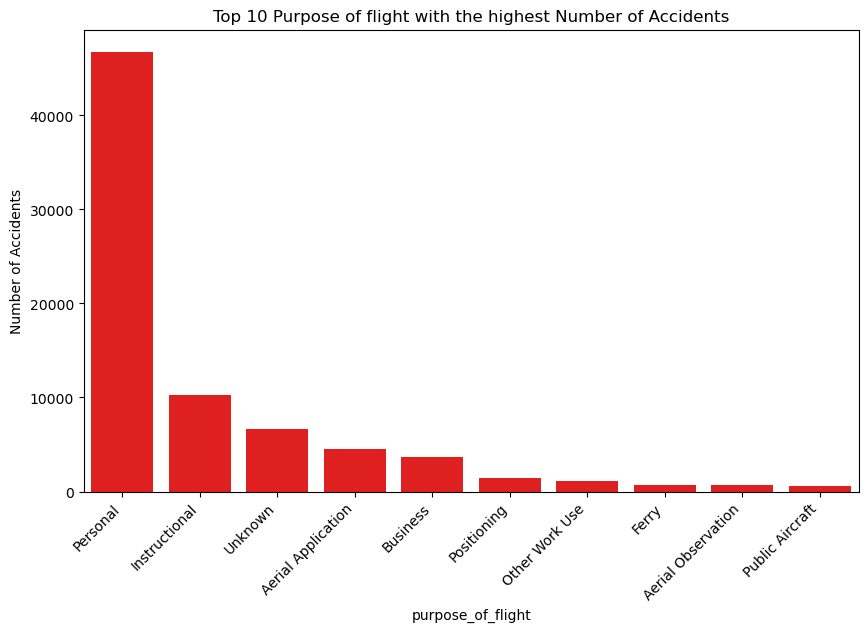

In [50]:
# Aviation Accidents based on the Purpose of flights
purpose_of_flight_10 = df_usa['purpose_of_flight'].value_counts().nlargest(10).index
purpose_of_flight = df_usa[df_usa['purpose_of_flight'].isin(purpose_of_flight_10)]

plt.figure(figsize=(10, 6))
sns.countplot(data=purpose_of_flight, x='purpose_of_flight', order=purpose_of_flight_10, color = 'red')
plt.title('Top 10 Purpose of flight with the highest Number of Accidents')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right') 
plt.show()

From the above graph it is evident that Personal, flights are the leading causes of accidents.
Thus, due to this, the company will need to restrict offering airplanes for this reasons and go for low use of flights with minimal accidents.

### Investigating which makes and models are prone to accidents.

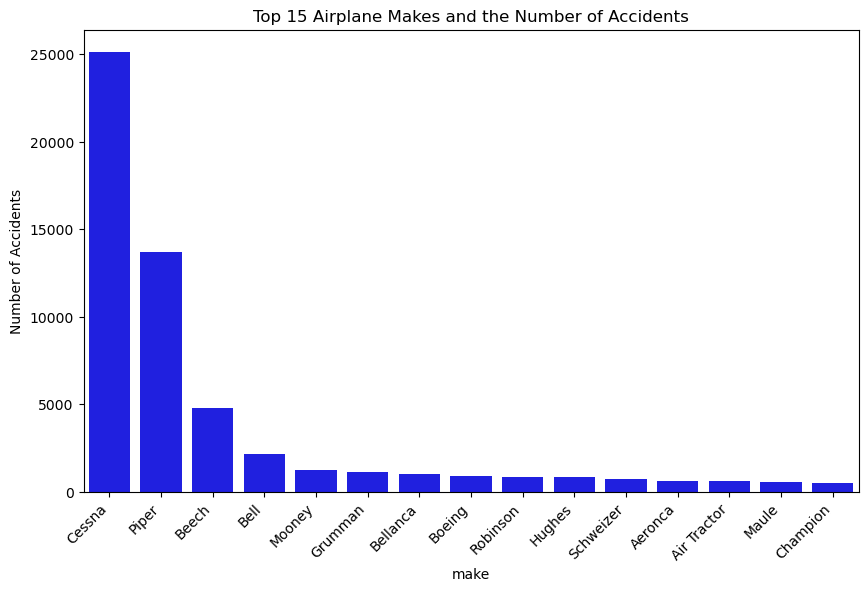

In [51]:
# Accidents based on the make of the Airplanes
top_15_makes = df_usa['make'].value_counts().nlargest(15).index

top_15_df = df_usa[df_usa['make'].isin(top_15_makes)]

plt.figure(figsize=(10, 6))
sns.countplot(data=top_15_df, x='make', order=top_15_makes, color = 'blue')
plt.title('Top 15 Airplane Makes and the Number of Accidents')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right') 
plt.show()

From the makes above, Cessna, Piper, and Beech Makes of airplanes have the highest number of accidents.
Thus, the company will need to cross-check against the makes to avoid the airplanes.

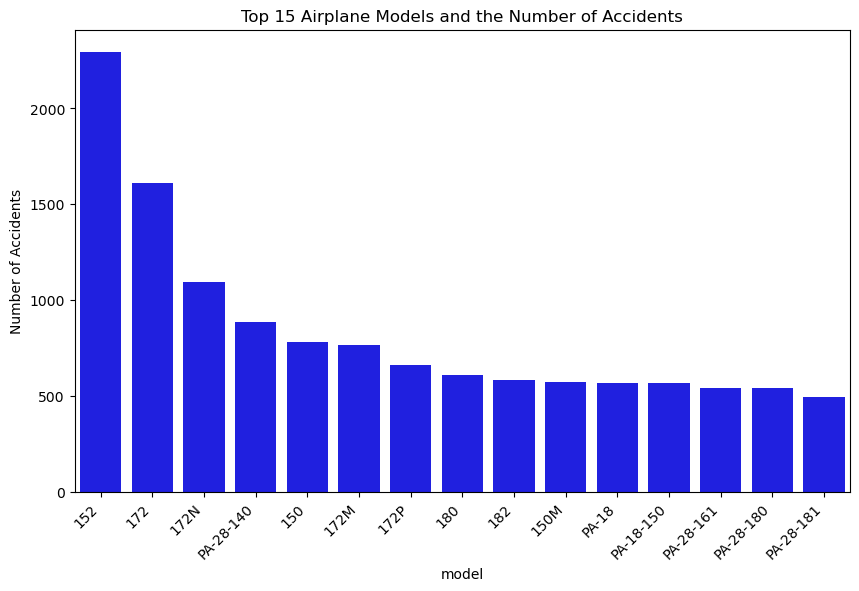

In [52]:
# Accidents based on the make of the Airplanes
top_15_models = df_usa['model'].value_counts().nlargest(15).index

top_15_df = df_usa[df_usa['model'].isin(top_15_models)]

plt.figure(figsize=(10, 6))
sns.countplot(data=top_15_df, x='model', order=top_15_models, color = 'blue')
plt.title('Top 15 Airplane Models and the Number of Accidents')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right') 
plt.show()

Observation:  
152, 172, 172N; These are the aircraft models with the highest accident rates. The company should avoid purchasing these models.

### Investigating how frequent accidents are according to the seasons

Bar plot of the number of accidents according to various seasons.

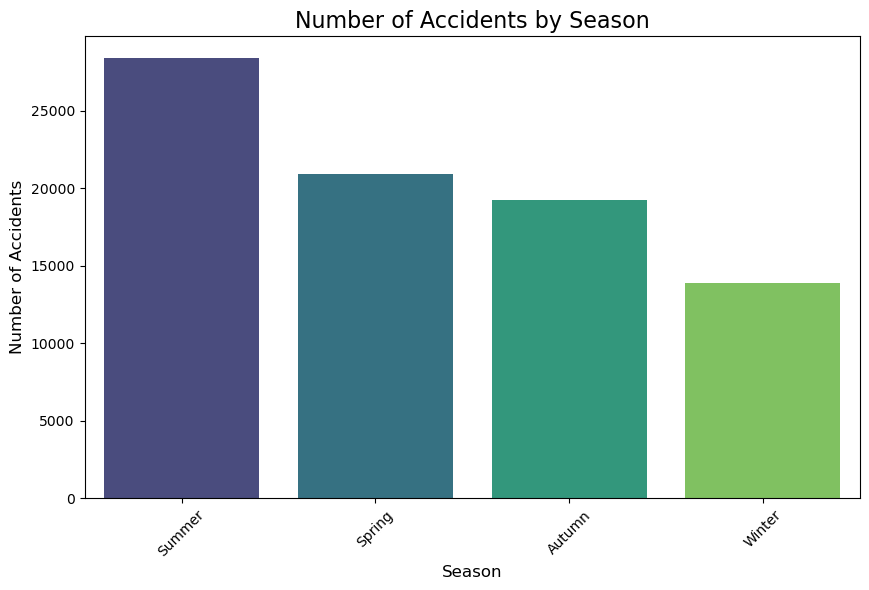

In [53]:
# Count the number of accidents for each season
season_counts = aviation_data['season'].value_counts().reindex(['Winter', 'Spring', 'Summer', 'Autumn']).sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=season_counts.index, y=season_counts.values, palette='viridis')

# Add labels and title
plt.title('Number of Accidents by Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45)
plt.show()

Observation:  
Summer dominates the accident occurrences since over 28,000 accidents occurred in the summer, making it the most accident-prone season by a significant margin.  
This could be due to increased flight activity during the summer months, as it coincides with holidays and favorable weather conditions for general aviation.  
Winter had 13,000 accidents, the lowest of all seasons. This might be due to a combination of fewer flights and more cautious operations in challenging weather conditions, such as snow, ice, and low visibility.  
Recommendation:  
Enhance safety protocols, particularly during the summer months. Implement more frequent maintenance checks, pilot training programs focusing on handling high traffic and potential weather anomalies like thunderstorms.  
Since summer sees the highest number of accidents, prioritizing safety initiatives during this season can have the most significant impact.

### Weather conditions plot

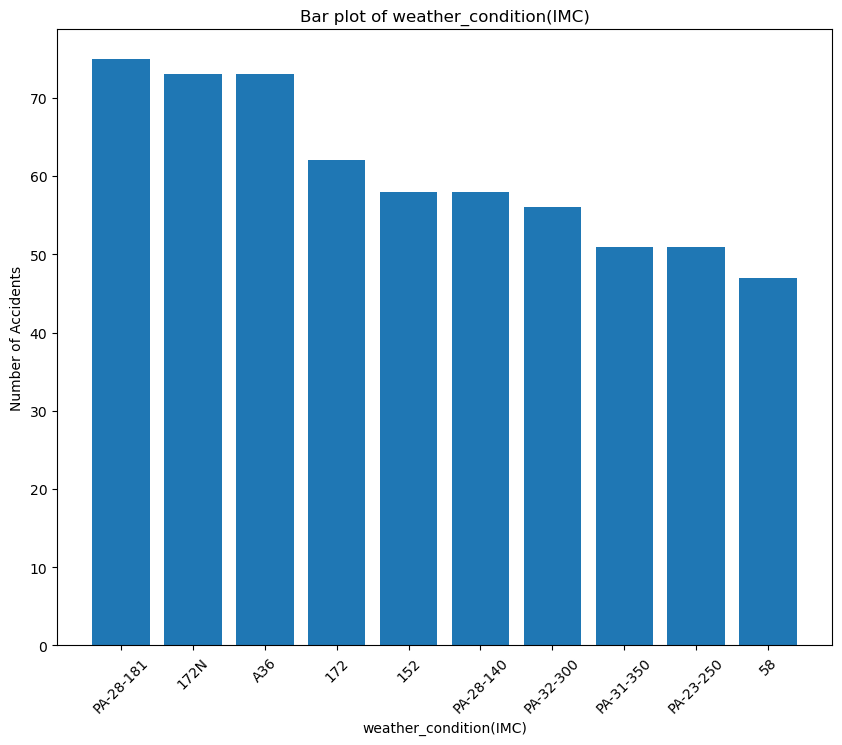

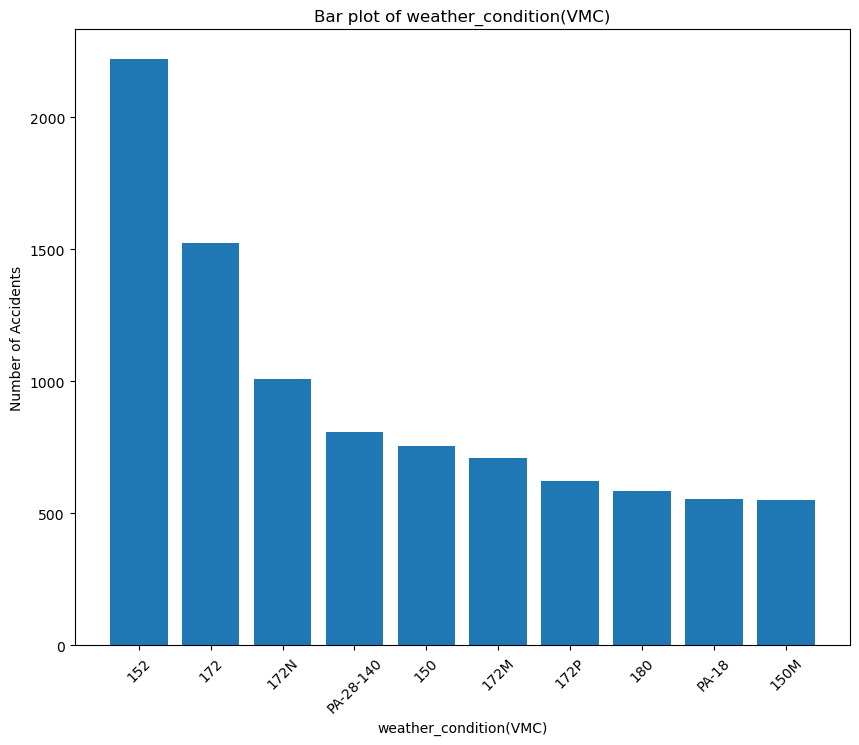

In [54]:
# Weather condition
Weather_data=df_usa.groupby(['weather_condition','model']).count()['number_of_engines'].sort_values(ascending=False)
Weather_data['VMC'].head(10)
Weather_data['IMC'].head(10)
# create a function
def Bar_plot(dataset,column):
    plt.figure(figsize=(10,8))
    plt.bar(x=dataset.index,height=dataset.values)
    plt.title(f'Bar plot of {column}')
    plt.ylabel('Number of Accidents')
    plt.xlabel(f'{column}')
    plt.xticks(rotation =45);
# Weather_data
Bar_plot(Weather_data['IMC'].head(10),'weather_condition(IMC)')
Bar_plot(Weather_data['VMC'].head(10),'weather_condition(VMC)')

VMC: Clear conditions, fly by sight.  
IMC: Poor visibility, fly-by instruments.  
From the Weather Condition plots above, it is evident that Pilots cause accidents under clear conditions when the visibility is very clear.

### Analyzing the states with the most cases

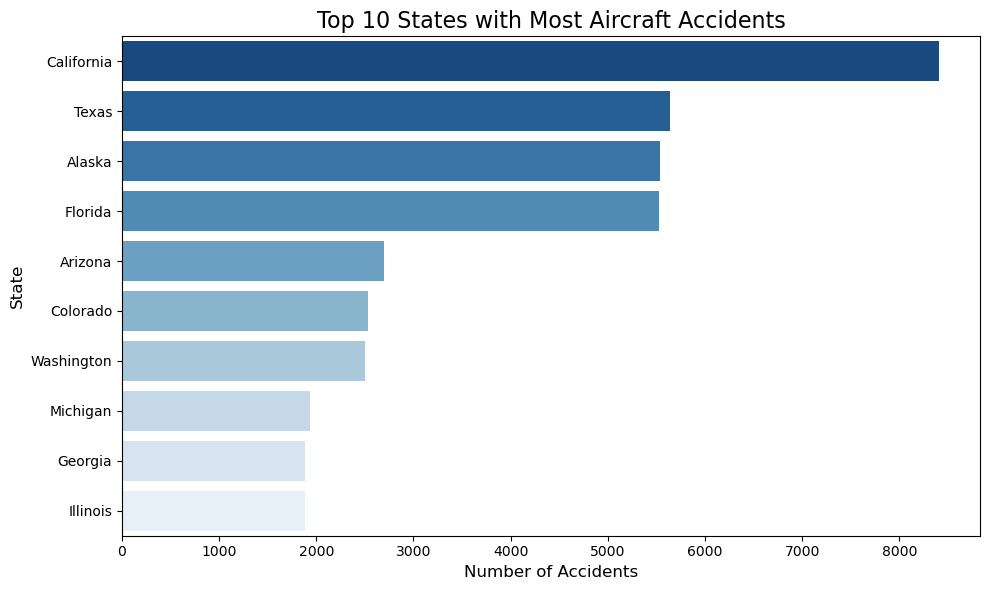

In [55]:
# Get the top 10 states with the most accidents
top_10_states = df_usa['state_name'].value_counts().head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_states.values, y=top_10_states.index, palette='Blues_r')
plt.title('Top 10 States with Most Aircraft Accidents', fontsize=16)
plt.xlabel('Number of Accidents', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.tight_layout()
plt.show()


Observation:  
California has the highest number of aircraft accidents, significantly ahead of other states with over 8,000 cases. This could be due to its large size, population, and heavy aviation activity, including both commercial and private aircraft.  
Texas, Florida, and Arizona also report high accident counts, which may be influenced by their large geographical areas, warmer climates, and significant aviation activity, including tourism and training flights.  
Recommendations:  
California, Texas, and Florida should be prioritized for safety audits and risk management strategies given their high accident counts.
Alaska requires special focus on weather-related safety measures and pilot training for challenging terrains.  
Implement state-specific safety programs based on common causes of accidents in each region. For example, emphasize weather-related safety in Alaska and terrain-based risks in Colorado and Washington.  
When expanding into the aviation sector, consider purchasing aircraft models that perform well in specific environments. For example, robust, weather-resistant aircraft could be prioritized for operations in Alaska and mountainous states.

### Analyzing number of accidents over the years

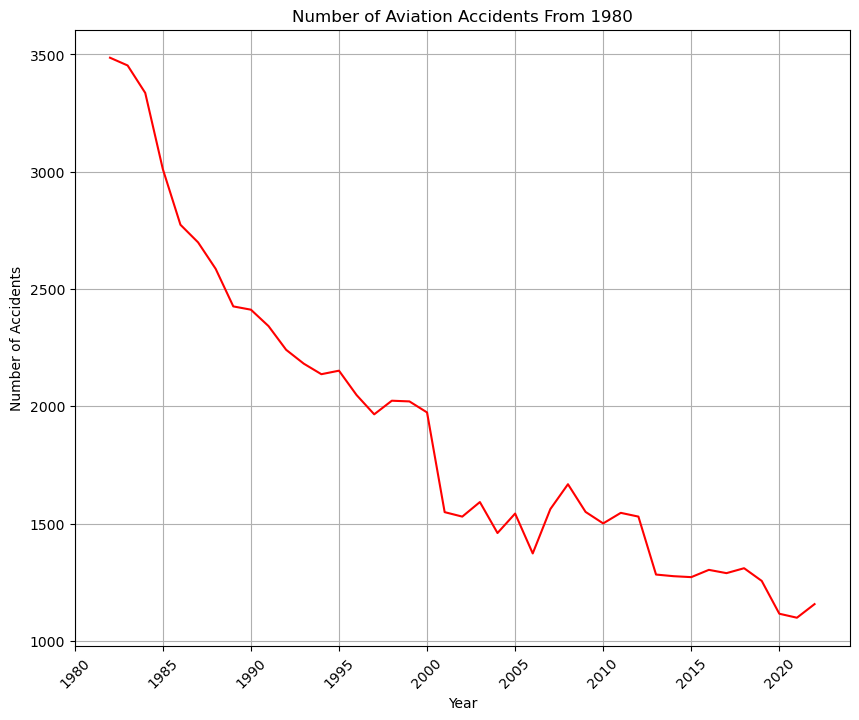

In [56]:
df_filtered = df_usa[df_usa['year'] >= 1982]

# Check for missing data and remove
df_filtered =df_filtered.dropna(subset=['year'])
# Get the value counts of the accidents
Accident_year = df_filtered['year'].value_counts().sort_index()
Accident_year
#Plot the year data
plt.figure(figsize=(10,8))
plt.plot(Accident_year.index,Accident_year.values, color = 'red')
plt.title('Number of Aviation Accidents From 1980')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

The plot above shows that the number of accidents has been declining over the years.  
Thus, air travel is becoming a safe means of transport over time.

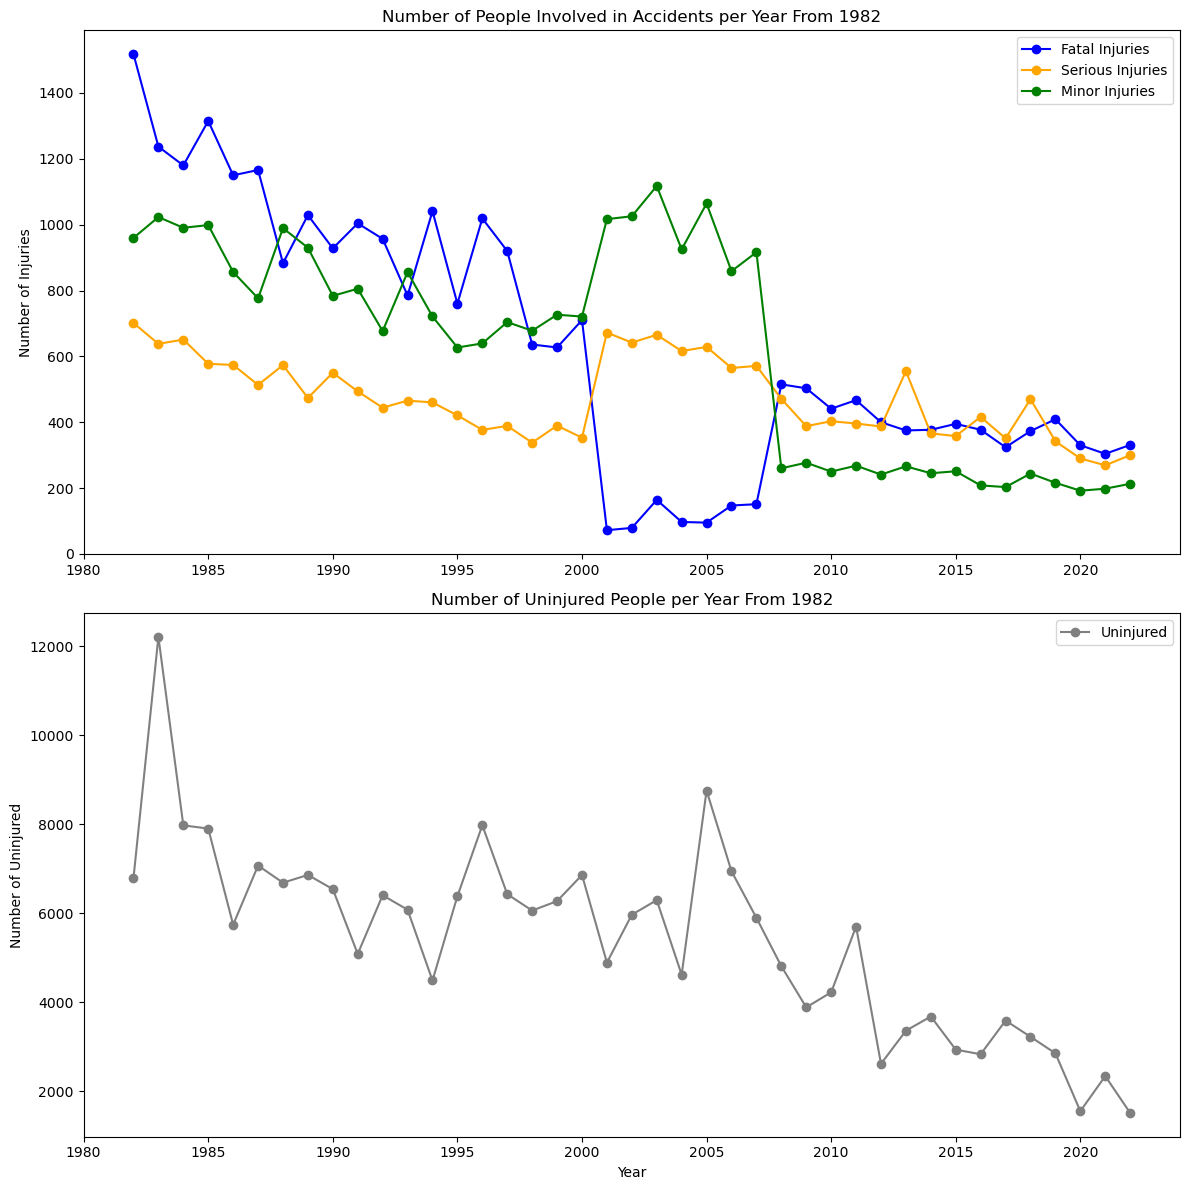

In [57]:
# Extract the year and filter the data from 1982 onwards
df_filtered = df_usa[df_usa['year'] >= 1982]

# Group by year and sum up injuries
yearly_data = df_filtered.groupby('year').agg({
    'total_fatal_injuries': 'sum',
    'total_serious_injuries': 'sum',
    'total_minor_injuries': 'sum',
    'total_uninjured': 'sum'
}).reset_index()

# Creating subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))

# Plotting injuries on the first subplot
ax1.plot(yearly_data['year'], yearly_data['total_fatal_injuries'], label='Fatal Injuries', color='blue', marker='o')
ax1.plot(yearly_data['year'], yearly_data['total_serious_injuries'], label='Serious Injuries', color='orange', marker='o')
ax1.plot(yearly_data['year'], yearly_data['total_minor_injuries'], label='Minor Injuries', color='green', marker='o')
ax1.set_title('Number of People Involved in Accidents per Year From 1982')
ax1.set_ylabel('Number of Injuries')
ax1.legend()

# Plotting uninjured on the second subplot
ax2.plot(yearly_data['year'], yearly_data['total_uninjured'], label='Uninjured', color='gray', marker='o')
ax2.set_title('Number of Uninjured People per Year From 1982')
ax2.set_xlabel('Year')
ax2.set_ylabel('Number of Uninjured')
ax2.legend()


# Tighten the layout and display the plot
plt.tight_layout()
plt.show()

From the time series plot above, the number of injured and uninjured airplane passengers has declined over the years.
Thus, the aviation industry is a good venture for the business to explore.

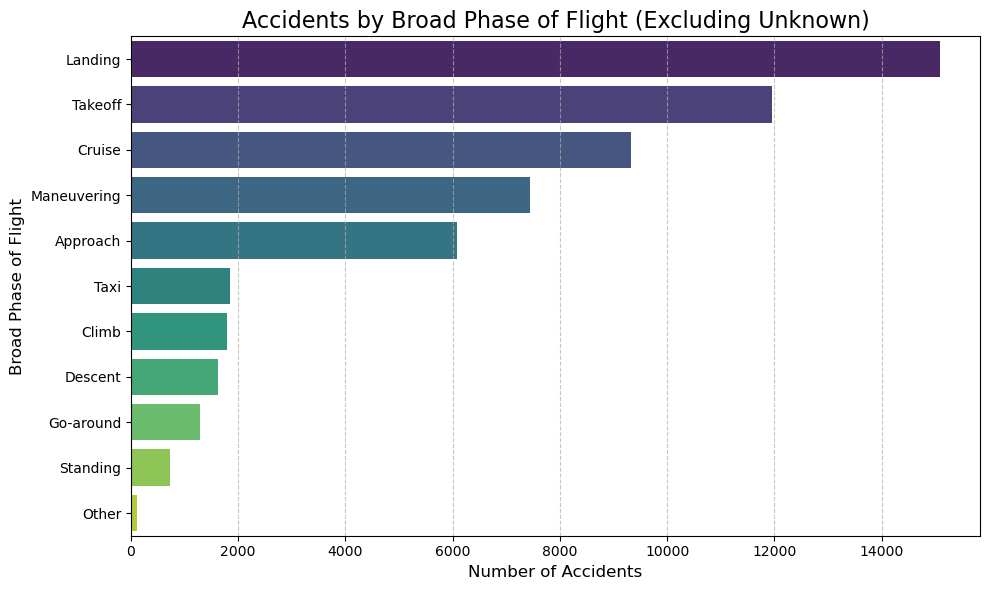

In [58]:
# Filter out 'Unknown' from the broad phase of flight
filtered_phase_counts = df_usa[df_usa['broad_phase_of_flight'] != 'Unknown']['broad_phase_of_flight'].value_counts()

# Create a bar plot for filtered broad phases of flight
plt.figure(figsize=(10, 6))
sns.barplot(x=filtered_phase_counts.values, y=filtered_phase_counts.index, palette='viridis')
plt.title('Accidents by Broad Phase of Flight (Excluding Unknown)', fontsize=16)
plt.xlabel('Number of Accidents', fontsize=12)
plt.ylabel('Broad Phase of Flight', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [59]:
filtered_phase_counts

broad_phase_of_flight
Landing        15079
Takeoff        11947
Cruise          9319
Maneuvering     7448
Approach        6085
Taxi            1843
Climb           1789
Descent         1619
Go-around       1293
Standing         732
Other            107
Name: count, dtype: int64

Observation:  
From this visualization, the landing phase is the most accident-prone phase.  
This is expected, as landing involves a combination of low altitude, speed control, and potential environmental challenges like wind shear or runway conditions.  
The takeoff phase is the second highest, with significant risks due to engine failures, poor weather, or pilot error during the critical initial climb.  
A significant portion of accidents during takeoff can lead to fatal or severe injuries due to low altitude and high speed.  

Recommendations:  


Enhance pilot training programs, particularly focusing on landing and takeoff techniques.
Encourage more frequent simulations of emergencies during these critical phases.
Invest in Advanced Safety Systems:

Equip aircraft with advanced safety technologies like Ground Proximity Warning Systems (GPWS) to reduce landing and approach risks.
Use Engine Health Monitoring Systems (EHMS) to detect early signs of engine failure before or during takeoff.
Improved Airport Infrastructure:

Upgrade airport runways, lighting, and navigational aids, especially in regions with higher accident rates.
Ensure adequate maintenance of taxiways to prevent incidents during taxi and standing phases.

### Accidents by Aircraft Category, Purpose of Flight, and Phase of Flight

Objective:  
To analyze how the aircraft category, purpose of flight, and broad phase of flight interact to determine where risks are concentrated. This insight helps identify riskier flight purposes and phases for different aircraft types.

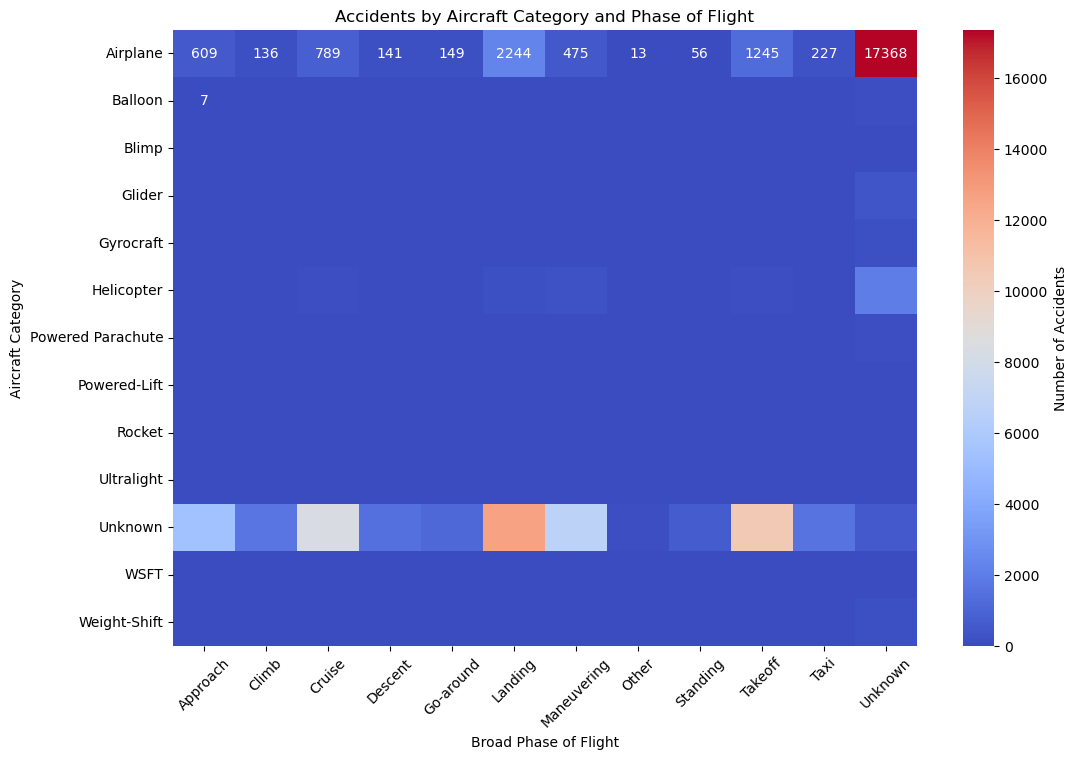

In [60]:
# Group the data and reshape it for heatmap
pivot_table = df_usa.pivot_table(
    index='aircraft_category', 
    columns='broad_phase_of_flight', 
    values='make',  # I an use 'make' or any column as a placeholder for counting
    aggfunc='count', 
    fill_value=0
)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap='coolwarm', cbar_kws={'label': 'Number of Accidents'})
plt.title('Accidents by Aircraft Category and Phase of Flight')
plt.xlabel('Broad Phase of Flight')
plt.ylabel('Aircraft Category')
plt.xticks(rotation=45)
plt.show()


Observation:  
From the above, most of the values were unknown, but we had to work with the data that was given.  
The airplane is mostly prone to accidents in the landing phase.